In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


# EDA

In [3]:
data.shape

(545, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


Their are <b>no missing values</b> in the data

## Target Data

#### The target data seems to be balanced with 41.65% semi-furnished, 32.66% unfurnished and 25.69% furnished data in the dataset

([<matplotlib.patches.Wedge at 0x193ffb380d0>,
 [Text(0.28521128309432414, 1.0623815340995388, 'semi-furnished'),
  Text(-0.9645476294288756, -0.5288174264934321, 'unfurnished'),
  Text(0.7608233961924185, -0.7944480850289933, 'furnished')],
 [Text(0.15556979077872224, 0.5794808367815666, '41.65'),
  Text(-0.5261168887793867, -0.2884458689964175, '32.66'),
  Text(0.4149945797413191, -0.43333531910672357, '25.69')])

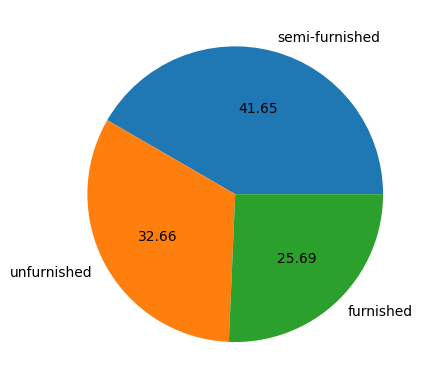

In [5]:
a = data['furnishingstatus'].value_counts()
plt.pie(a.values, labels = a.index, autopct='%.2f')

## Continuous Data

* So, both "age" and "price" are <b>right(+vely) skewed</b> which can be removed through scaling
* And both <b>have outliers</b> which needs to handled

In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


C:\Users\Simhadri Kushal\AppData\Local\Temp\ipykernel_47400\2971264250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


<Axes: xlabel='price', ylabel='Density'>

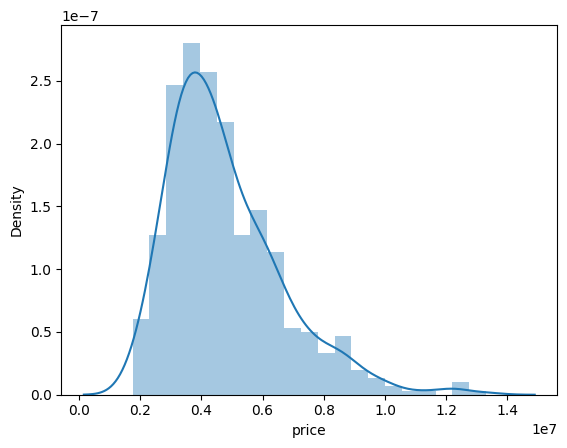

In [7]:
sns.distplot(data.price)

<Axes: >

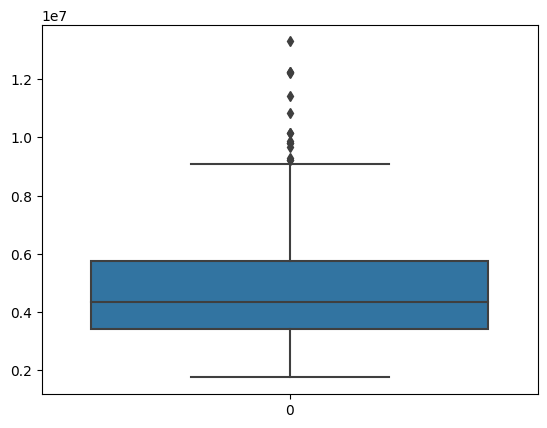

In [8]:
sns.boxplot(data.price)

C:\Users\Simhadri Kushal\AppData\Local\Temp\ipykernel_47400\3720680161.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.area)


<Axes: xlabel='area', ylabel='Density'>

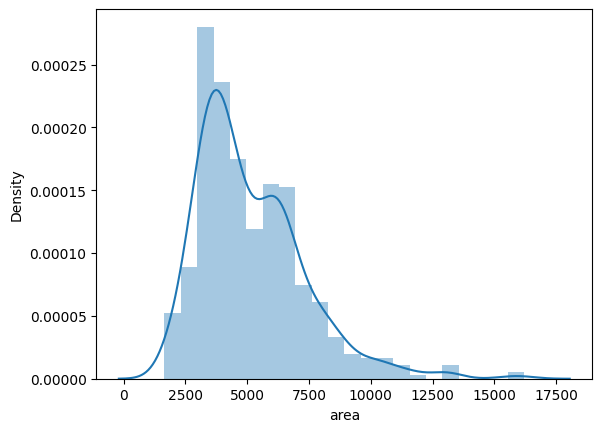

In [9]:
sns.distplot(data.area)

<Axes: >

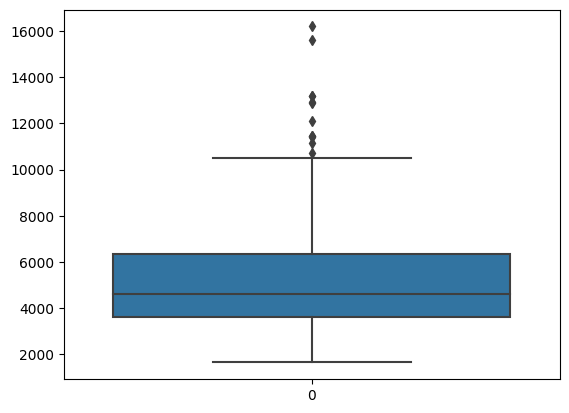

In [10]:
sns.boxplot(data.area)

## Categorical Data

* The variables <b>"stories", "guestroom", "basement" and "aircontidioning"</b> show us an intresting result by having a some-what equalized spread amount the three categories of the being furnished, un-furnished or semi-furnished by which we conclude they either have a <b>some-what nutral relation with "furnishingstatus"</b>
* And each of there variables have a good spread of data among their value counts

In [11]:
def count_plot(data, feature, title, hue=True): 
    plt.figure(figsize=(7, 5))
    total = float(len(data))
    if hue:
        ax = sns.countplot(x=data[feature], hue=data['furnishingstatus'])
    else:
        ax = sns.countplot(x=data[feature], hue=None)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    ax.set_title(title, fontsize=16, y=1.05)
    sns.despine(right=True)
    sns.despine(offset=5, trim=True)

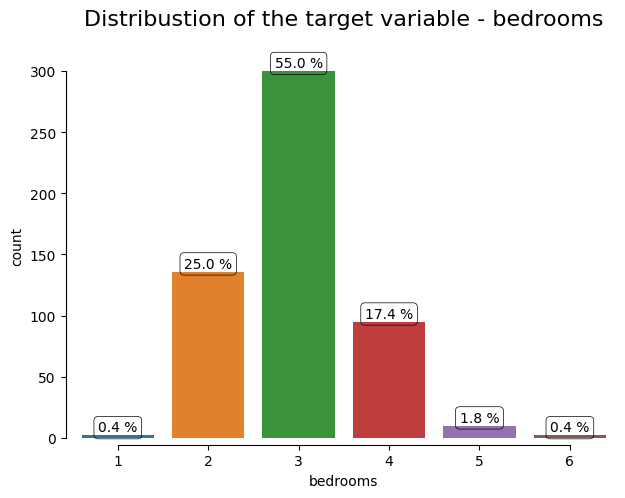

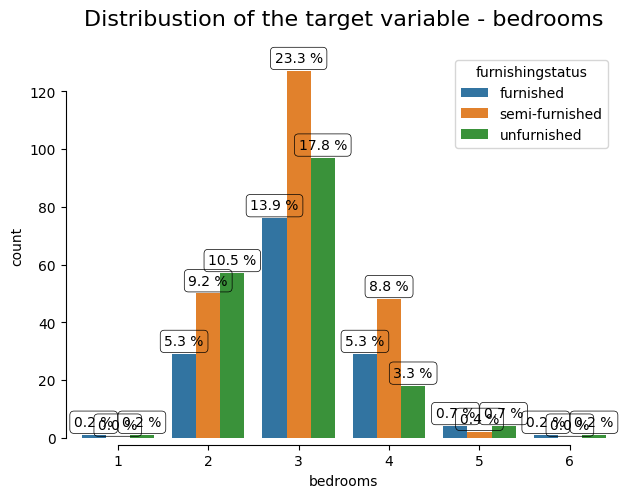

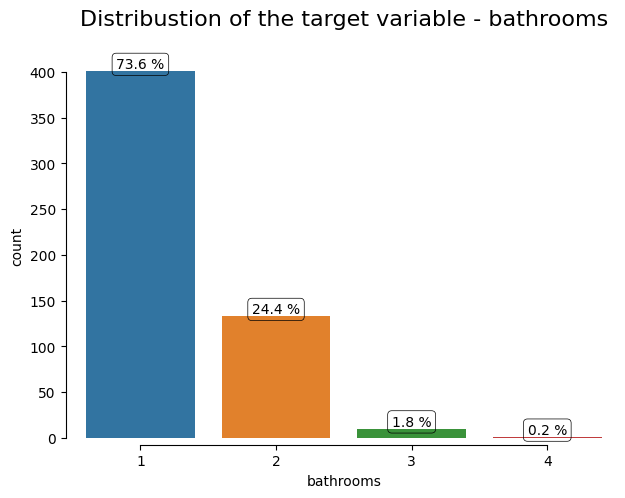

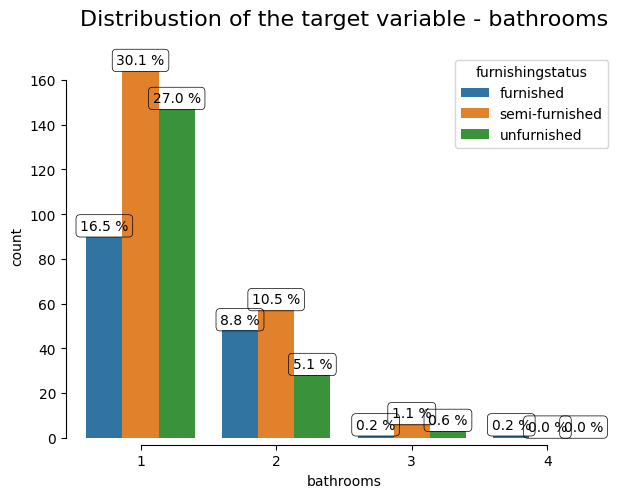

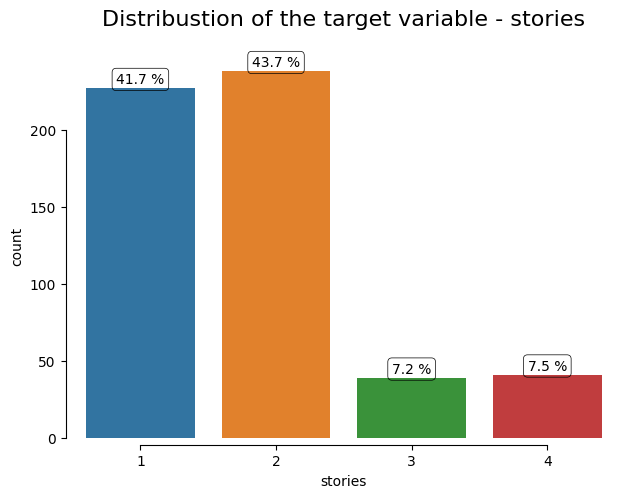

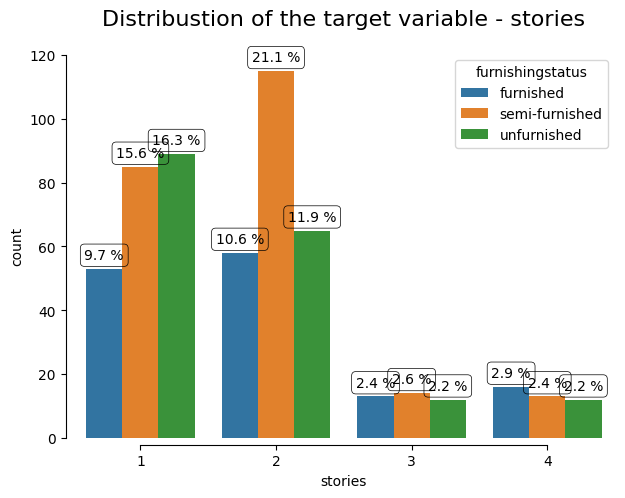

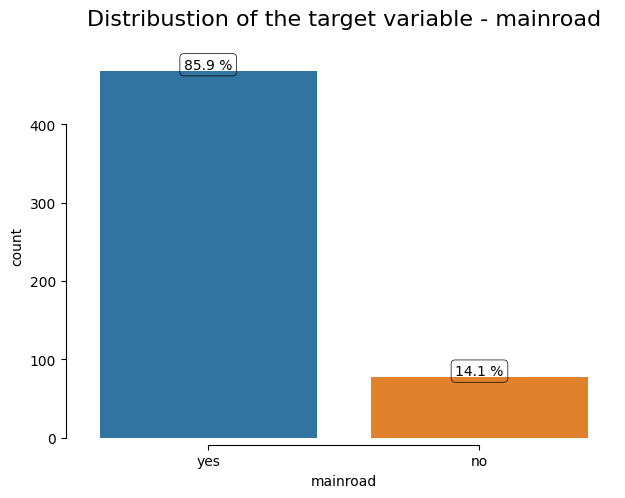

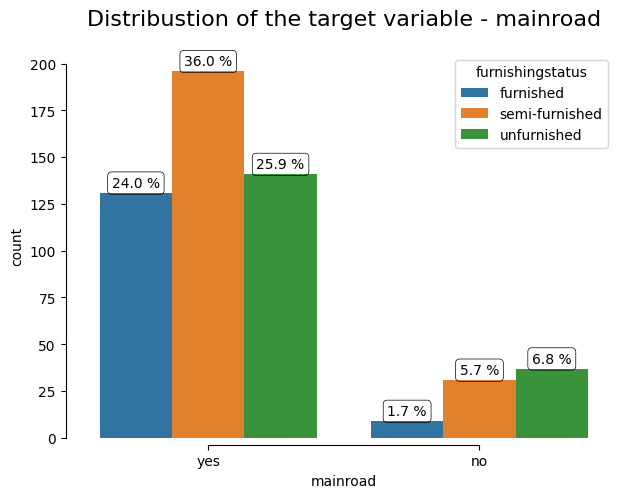

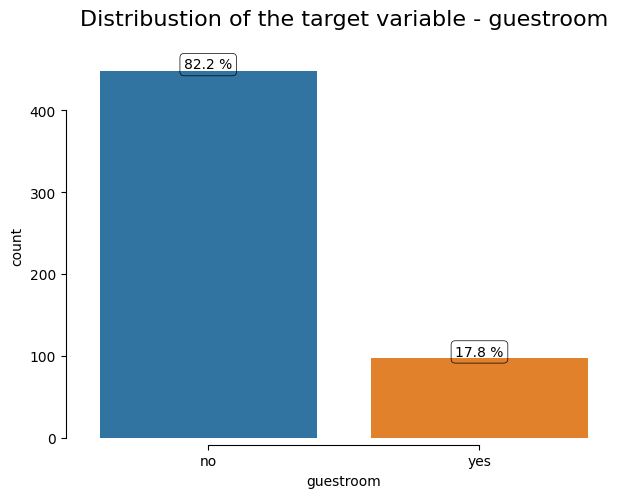

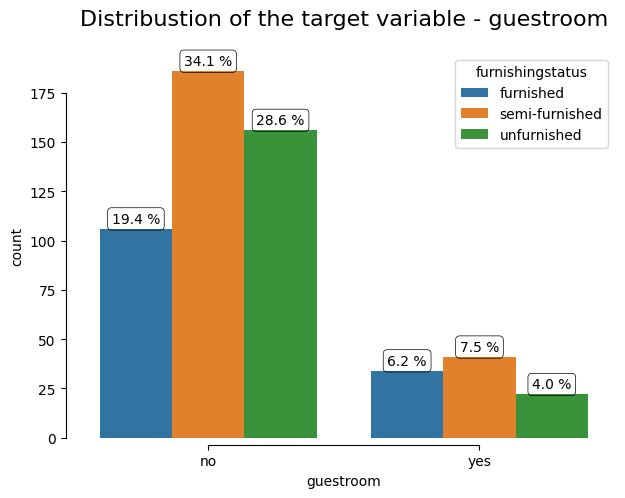

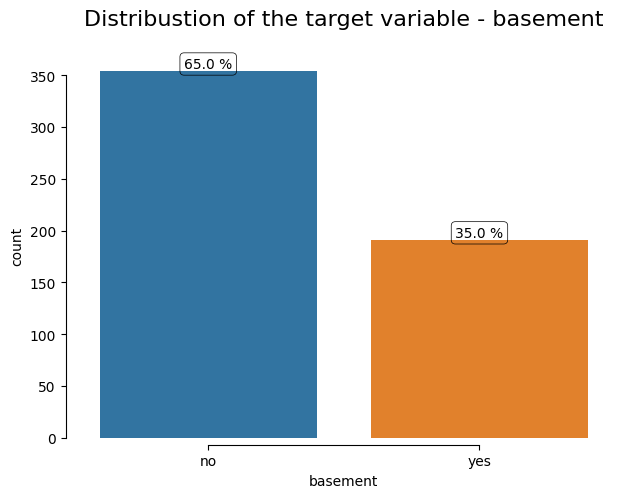

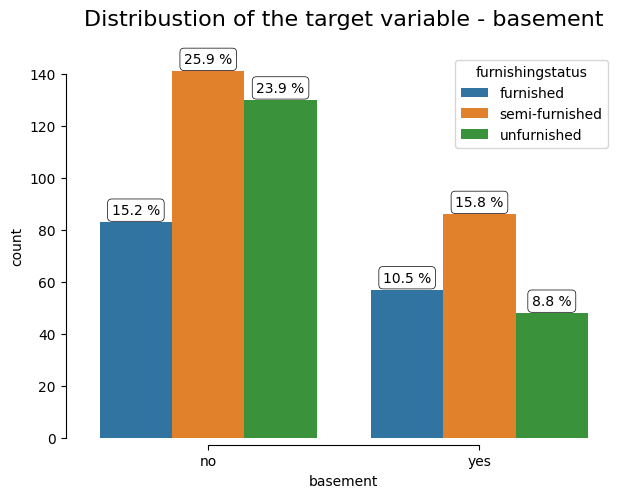

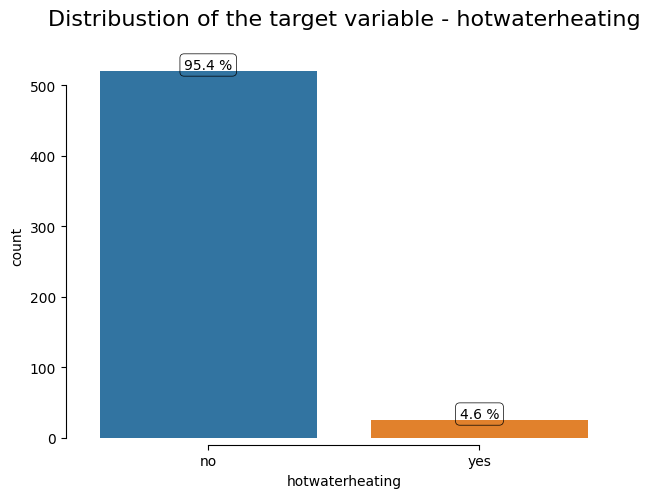

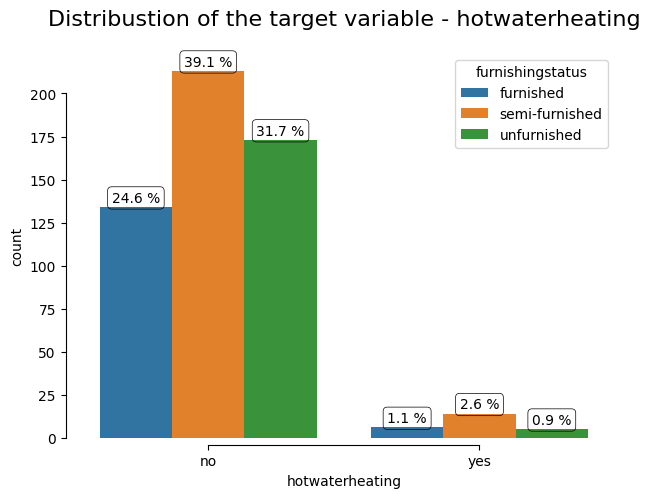

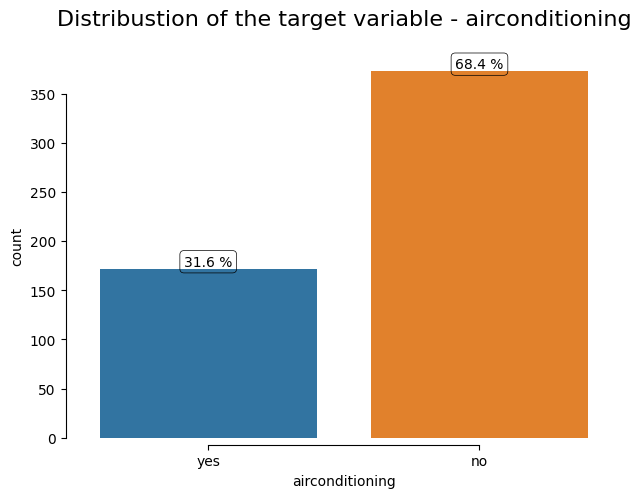

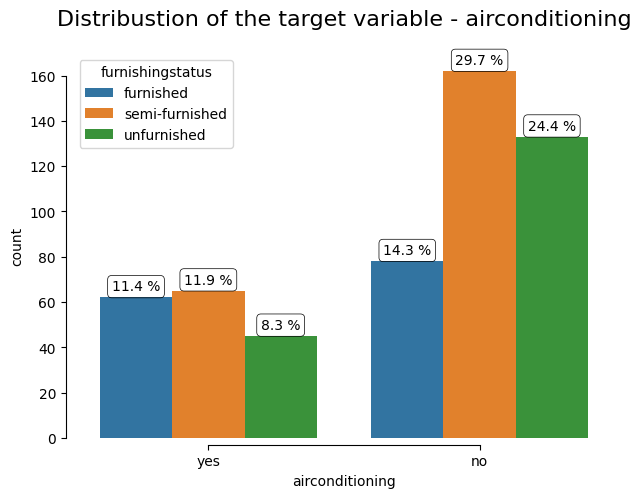

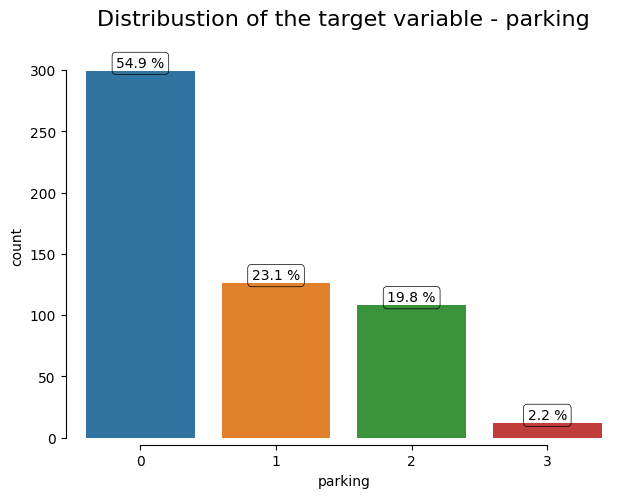

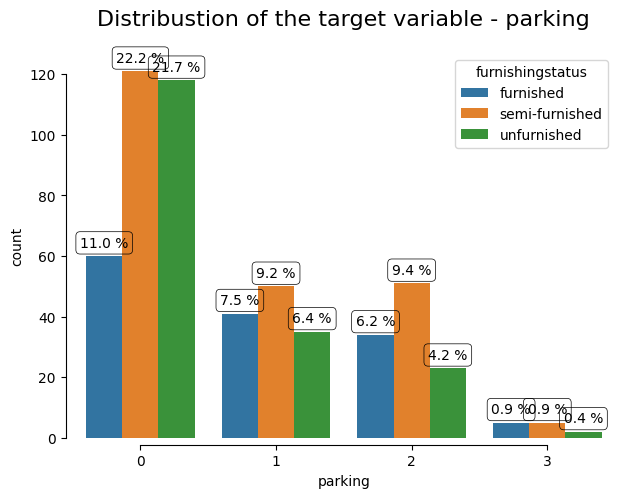

In [12]:
cat_col = ["bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking"]
for i in cat_col:
    count_plot(data, i, 'Distribustion of the target variable - ' + i, hue=0)
    count_plot(data, i, 'Distribustion of the target variable - ' + i, hue=1)

* if "guestroom"and "basemant" are a NO and "hotwaterheating" and "airconditioning" are a Yes then their is a 100% probability of that house be semi-furnished
* if "hotwaterheating "and "basemant" are a NO and "guestroom" and "airconditioning" are a Yes then their is a 100% probability of that house be semi-furnished

In [13]:
col = ["guestroom", "basement", "hotwaterheating", "airconditioning"]
print(data.groupby(col)['furnishingstatus'].value_counts(normalize=True).mul(100))

guestroom  basement  hotwaterheating  airconditioning  furnishingstatus
no         no        no               no               unfurnished          41.333333
                                                       semi-furnished       39.111111
                                                       furnished            19.555556
                                      yes              semi-furnished       37.500000
                                                       unfurnished          34.090909
                                                       furnished            28.409091
                     yes              no               semi-furnished       57.142857
                                                       furnished            28.571429
                                                       unfurnished          14.285714
                                      yes              semi-furnished      100.000000
           yes       no               no               semi-furnishe

# Feature Engineering

In [14]:
Vmap = {
    "yes": 1,
    "no" : 0
}
data[col] = data[col].replace(Vmap)
data['mainroad'] = data['mainroad'].replace(Vmap)

Vmap = {
    "furnished": 0,
    "semi-furnished": 1,
    "unfurnished": 2
}
data["furnishingstatus"] = data['furnishingstatus'].replace(Vmap)

# Data Processing & Feature Selection

In [15]:
# function to replace the outliers with mean values
def impute_outliers_IQR(data):
   q1=data.quantile(0.25)
   q3=data.quantile(0.75)
   IQR=q3-q1
   upper = data[~(data>(q3+1.5*IQR))].max()
   lower = data[~(data<(q1-1.5*IQR))].min()
   data = np.where(data > upper,data.mean(),np.where(data < lower,data.mean(),data))
   return data

In [16]:
data['price'] = pd.DataFrame(impute_outliers_IQR(data.price), columns = ['price'])
data['area'] = pd.DataFrame(impute_outliers_IQR(data.price), columns = ['area'])

<Axes: >

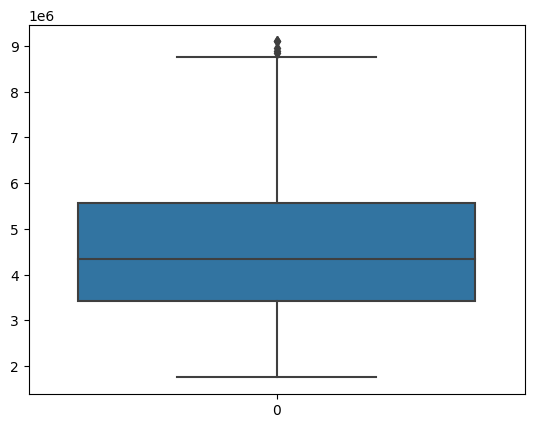

In [17]:
sns.boxplot(data.price)

<Axes: >

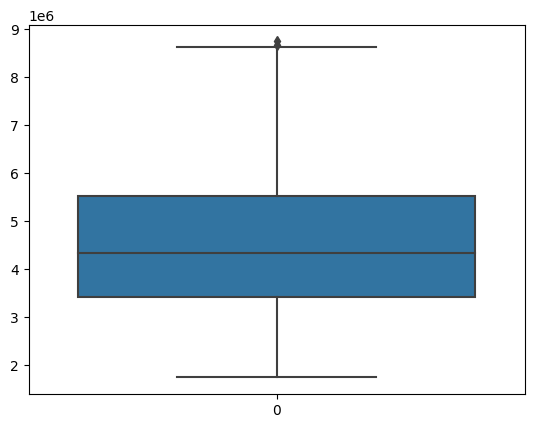

In [18]:
sns.boxplot(data.area)

In [19]:
X = data.copy()
X.drop(columns=['furnishingstatus'], inplace=True)
y = data['furnishingstatus']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)
X_test = X_valid

# Modelling

In [24]:
# Sklearn
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [25]:
def train_accuracy(model):
    # Perform k-fold cross-validation
    k_folds = 10
    cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=0)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    # Get the cross-validated predictions
    preds = cross_val_predict(model, X, y, cv=cv)

    # Print the accuracy for each fold
    print("Accuracy for each fold:")
    for fold, score in enumerate(scores):
        print(f"Fold {fold+1}: {score}")

    # Calculate and print the average accuracy across all folds
    average_accuracy = np.mean(scores)
    print("Average accuracy:", average_accuracy)

In [26]:
DTC = DecisionTreeClassifier()
train_accuracy(DTC)

Accuracy for each fold:
Fold 1: 0.45454545454545453
Fold 2: 0.509090909090909
Fold 3: 0.32727272727272727
Fold 4: 0.32727272727272727
Fold 5: 0.41818181818181815
Fold 6: 0.4444444444444444
Fold 7: 0.35185185185185186
Fold 8: 0.4074074074074074
Fold 9: 0.37037037037037035
Fold 10: 0.4074074074074074
Average accuracy: 0.4017845117845118


In [27]:
lorreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
train_accuracy(lorreg)

Accuracy for each fold:
Fold 1: 0.41818181818181815
Fold 2: 0.41818181818181815
Fold 3: 0.4
Fold 4: 0.41818181818181815
Fold 5: 0.4
Fold 6: 0.42592592592592593
Fold 7: 0.42592592592592593
Fold 8: 0.4074074074074074
Fold 9: 0.4074074074074074
Fold 10: 0.4074074074074074
Average accuracy: 0.4128619528619528


In [28]:
RF = RandomForestClassifier(max_depth=20, random_state=13, n_estimators=150)
train_accuracy(RF)

Accuracy for each fold:
Fold 1: 0.43636363636363634
Fold 2: 0.6181818181818182
Fold 3: 0.43636363636363634
Fold 4: 0.4727272727272727
Fold 5: 0.5454545454545454
Fold 6: 0.46296296296296297
Fold 7: 0.4444444444444444
Fold 8: 0.5
Fold 9: 0.3333333333333333
Fold 10: 0.3888888888888889
Average accuracy: 0.4638720538720539


In [29]:
KNN = KNeighborsClassifier()
train_accuracy(KNN)

Accuracy for each fold:
Fold 1: 0.4
Fold 2: 0.5818181818181818
Fold 3: 0.43636363636363634
Fold 4: 0.45454545454545453
Fold 5: 0.41818181818181815
Fold 6: 0.5555555555555556
Fold 7: 0.46296296296296297
Fold 8: 0.6111111111111112
Fold 9: 0.37037037037037035
Fold 10: 0.35185185185185186
Average accuracy: 0.4642760942760943


In [30]:
NB = GaussianNB()
train_accuracy(NB)

Accuracy for each fold:
Fold 1: 0.5272727272727272
Fold 2: 0.5818181818181818
Fold 3: 0.4909090909090909
Fold 4: 0.5272727272727272
Fold 5: 0.5272727272727272
Fold 6: 0.5555555555555556
Fold 7: 0.5555555555555556
Fold 8: 0.6851851851851852
Fold 9: 0.5370370370370371
Fold 10: 0.5185185185185185
Average accuracy: 0.5506397306397306


In [31]:
NB.fit(X_train, y_train)
y_pred = NB.predict(X_valid)

In [32]:
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_valid, y_pred)
print('Confusion Matrix:')
print(cm)

report = classification_report(y_valid, y_pred)
print('Classification Report:')
print(report)

cv_scores = cross_val_score(NB, X, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Average Cross-Validation Score:', np.mean(cv_scores))

Accuracy: 0.5229357798165137
Confusion Matrix:
[[ 8 13  7]
 [ 7 30  8]
 [ 5 12 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.29      0.33        28
           1       0.55      0.67      0.60        45
           2       0.56      0.53      0.54        36

    accuracy                           0.52       109
   macro avg       0.50      0.49      0.49       109
weighted avg       0.51      0.52      0.51       109

Cross-Validation Scores: [0.24770642 0.5412844  0.71559633 0.71559633 0.33027523]
Average Cross-Validation Score: 0.5100917431192661
